In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/audiology.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal import pycausal as pc
pc.start_vm(java_max_heap_size = '100M')

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['history_noise','class'],['history_fluctuating','class']]
tempForbid = p.ForbiddenWithin(
    ['class','history_fluctuating','history_noise'])
temporal = [tempForbid]
prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* class history_fluctuating history_noise 

forbiddirect

history_fluctuating ==> class 
history_noise ==> class 
requiredirect


#### Load causal algorithms from the py-causal library and Run FGES Discrete

In [5]:
from pycausal import search as s
fges = s.fgesDiscrete(df,structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, 
numofthreads = 2, verbose = True, priorKnowledge = prior)

#### FGES Discrete's Result's Nodes

In [6]:
fges.getNodes()

[u'age_gt_60',
 u'air',
 u'airBoneGap',
 u'ar_c',
 u'ar_u',
 u'bone',
 u'boneAbnormal',
 u'bser',
 u'history_buzzing',
 u'history_dizziness',
 u'history_fluctuating',
 u'history_fullness',
 u'history_heredity',
 u'history_nausea',
 u'history_noise',
 u'history_recruitment',
 u'history_ringing',
 u'history_roaring',
 u'history_vomiting',
 u'late_wave_poor',
 u'm_at_2k',
 u'm_cond_lt_1k',
 u'm_gt_1k',
 u'm_m_gt_2k',
 u'm_m_sn',
 u'm_m_sn_gt_1k',
 u'm_m_sn_gt_2k',
 u'm_m_sn_gt_500',
 u'm_p_sn_gt_2k',
 u'm_s_gt_500',
 u'm_s_sn',
 u'm_s_sn_gt_1k',
 u'm_s_sn_gt_2k',
 u'm_s_sn_gt_3k',
 u'm_s_sn_gt_4k',
 u'm_sn_2_3k',
 u'm_sn_gt_1k',
 u'm_sn_gt_2k',
 u'm_sn_gt_3k',
 u'm_sn_gt_4k',
 u'm_sn_gt_500',
 u'm_sn_gt_6k',
 u'm_sn_lt_1k',
 u'm_sn_lt_2k',
 u'm_sn_lt_3k',
 u'middle_wave_poor',
 u'mod_gt_4k',
 u'mod_mixed',
 u'mod_s_mixed',
 u'mod_s_sn_gt_500',
 u'mod_sn',
 u'mod_sn_gt_1k',
 u'mod_sn_gt_2k',
 u'mod_sn_gt_3k',
 u'mod_sn_gt_4k',
 u'mod_sn_gt_500',
 u'notch_4k',
 u'notch_at_4k',
 u'o_ar_c',
 

#### FGES Discrete's Result's Nodes

In [7]:
fges.getEdges()

[u'class --- age_gt_60',
 u'o_ar_c --- ar_c',
 u'o_ar_c --- ar_u',
 u'history_vomiting --> history_roaring',
 u'age_gt_60 --- m_m_sn',
 u'history_dizziness --- static_normal',
 u'speech --> air',
 u'ar_c --- o_ar_u',
 u'middle_wave_poor --- late_wave_poor',
 u'history_noise --- notch_at_4k',
 u'airBoneGap --- tymp',
 u'history_fluctuating --> history_recruitment',
 u'class --- notch_at_4k',
 u'history_fullness --- history_buzzing',
 u'history_dizziness --> history_fluctuating',
 u'notch_4k --- m_m_sn_gt_2k',
 u'bser --- middle_wave_poor',
 u'history_roaring --> history_nausea',
 u'history_buzzing --- wave_V_delayed',
 u'o_ar_u --- bone',
 u'airBoneGap --- ar_u',
 u'history_recruitment --> m_sn_gt_1k',
 u'static_normal --- waveform_ItoV_prolonged',
 u'history_dizziness --> history_roaring',
 u'm_sn_lt_1k --> history_fluctuating',
 u's_sn_gt_2k --- history_heredity',
 u'airBoneGap --> air',
 u'class --- tymp',
 u'bone --- boneAbnormal']

#### Plot The Result's Graph

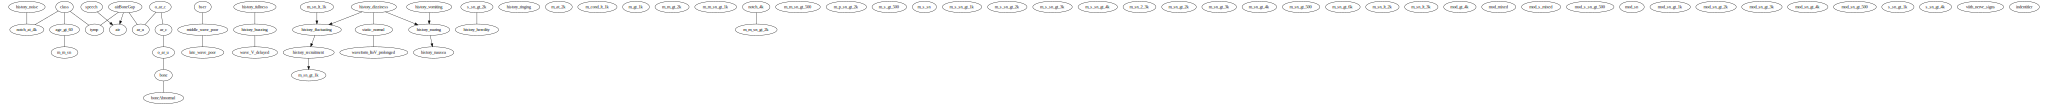

In [8]:
dot = fges.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [9]:
pc.stop_vm()